# Importing the Packages

In [11]:
# loading dataset
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA
import pandas_profiling as pp

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Processing the Data

In [12]:
df = pd.read_csv('framingham.csv')

**We can check if the data is loaded or not by using head() and tail() function**

In [13]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [14]:
df.tail()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0

**We can use `info()` function to see the information of that file**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [16]:
df.shape # We can check how big the file is

(4238, 16)

**Before we apply the data to the ML model, we should check whether there is null value or not**

In [17]:
df.isnull()

male    age  education  currentSmoker  cigsPerDay  BPMeds  \
0     False  False      False          False       False   False   
1     False  False      False          False       False   False   
2     False  False      False          False       False   False   
3     False  False      False          False       False   False   
4     False  False      False          False       False   False   
...     ...    ...        ...            ...         ...     ...   
4233  False  False      False          False       False   False   
4234  False  False      False          False       False   False   
4235  False  False      False          False       False    True   
4236  False  False      False          False       False   False   
4237  False  False      False          False       False   False   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0               False         False     False    False  False  False  False   
1               False         False     False    False  False  False  False   
2               False         False     False    False  False  False  False   
3               False         False     False    False  False  False  False   
4               False         False     False    False  False  False  False   
...               ...           ...       ...      ...    ...    ...    ...   
4233            False         False     False    False  False  False  False   
4234            False         False     False    False  False  False  False   
4235            False         False     False    False  False  False  False   
4236            False         False     False    False  False  False  False   
4237            False         False     False    False  False  False  False   

      heartRate  glucose  TenYearCHD  
0         False    False       False  
1         False    False       False  
2         False    False       False  
3         False    False       False  
4         False    False       False  
...         ...      ...         ...  
4233      False    False       False  
4234      False    False       False  
4235      False    False       False  
4236      False     True       False  
4237      False    False       False  

[4238 rows x 16 columns]

**The DataFrame above shows only two True values, so we can use the function `isnull().sum()` to check if there exists more**

In [18]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Now we are going to delete the rows which has at least one null value**

In [19]:
df = df.dropna(axis = 'rows')

**Now we can see that there is no null value in this DataFrame**

In [20]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**There are two different ways to change the column name**
  - use `column()`
  - use function `rename`

**We are going to use `rename` to change the column name**

In [21]:
df = df.rename(columns = {'male': 'gender'}) # 1 means male, 0 means female

In [22]:
df

gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
0          1   39        4.0              0         0.0     0.0   
1          0   46        2.0              0         0.0     0.0   
2          1   48        1.0              1        20.0     0.0   
3          0   61        3.0              1        30.0     0.0   
4          0   46        3.0              1        23.0     0.0   
...      ...  ...        ...            ...         ...     ...   
4231       1   58        3.0              0         0.0     0.0   
4232       1   68        1.0              0         0.0     0.0   
4233       1   50        1.0              1         1.0     0.0   
4234       1   51        3.0              1        43.0     0.0   
4237       0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4231                0             1         0    187.0  141.0   81.0  24.96   
4232                0             1         0    176.0  168.0   97.0  23.14   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4231       80.0     81.0           0  
4232       60.0     79.0           1  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4237       80.0    107.0           0  

[3656 rows x 16 columns]

**What if we want to add our team members' name as the patients' names to the DataFrame**

In [23]:
add_name = pd.DataFrame(['Boris', 'Eason', 'Owen', 'Ethan', 'Hsu-Ja-Kang'], columns = ['Name'])
pd.merge(add_name, df, left_index = True, right_index = True, how = 'outer').head()

Name  gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        Boris       1   39        4.0              0         0.0     0.0   
1        Eason       0   46        2.0              0         0.0     0.0   
2         Owen       1   48        1.0              1        20.0     0.0   
3        Ethan       0   61        3.0              1        30.0     0.0   
4  Hsu-Ja-Kang       0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  TenYearCHD  
0       80.0     77.0           0  
1       95.0     76.0           0  
2       75.0     70.0           0  
3       65.0    103.0           1  
4       85.0     85.0           0

**We use function `set_index` to choose the feature `age` , and see the relationship between the most five cigsPerDay person and their ages in the file** 

In [24]:
df_new = df.set_index('age')
df_new['cigsPerDay'].sort_values(ascending = False).head()

age
40    70.0
50    60.0
58    60.0
39    60.0
59    60.0
Name: cigsPerDay, dtype: float64

In [25]:
df_new.reset_index(inplace = True) # reset the index

**Using `pivot_table` to see more information about the relationship of age, education and cigsPerDay**

In [26]:
df_compare = df.pivot_table(values = 'cigsPerDay',index = 'age', columns = 'education',
              aggfunc = np.mean, margins = False).dropna(axis = 0)
df_compare

education        1.0        2.0        3.0        4.0
age                                                  
33          0.000000   2.500000  15.000000   0.000000
34         12.500000  10.714286   7.500000   0.000000
35          7.500000  10.260870  12.500000   6.500000
36          8.150000  11.419355   8.333333  11.357143
37         12.083333  12.066667  13.000000  14.312500
38         10.333333  10.655172   7.900000   6.750000
39         14.200000  11.593220   7.086957   8.263158
40         15.097561   9.571429  13.117647  16.333333
41         10.000000  12.701493   9.600000   9.111111
42         13.037736  11.847458  10.766667   7.000000
43         15.131579  12.679245   9.545455  15.916667
44         10.765625  13.090909  10.647059   9.611111
45          6.355556   9.756098  11.878788  10.904762
46         12.071429  10.085106   9.194444  14.153846
47         11.704545  14.083333   9.200000   9.571429
48          9.375000  12.714286   5.080000   8.800000
49          8.400000  10.314286   7.166667   9.545455
50          9.679245  10.371429   8.666667  16.000000
51         13.283019   5.685714   5.681818   9.461538
52          6.015625   8.151515   8.277778   8.928571
53         10.895833   5.771429  12.500000   4.400000
54          6.553571   9.387097   8.958333   6.250000
55          6.560606   4.214286   7.052632   2.900000
56          9.297872   9.375000   2.000000   6.727273
57          7.682540   4.666667   8.285714   5.400000
58          7.163265   7.814815   4.416667   7.444444
59          6.450980   8.083333   8.705882   8.750000
60          5.711864   7.846154   1.833333   8.125000
61          5.320755   4.789474   6.909091   3.125000
62          5.603774   1.705882   8.000000   9.818182
63          4.214286   8.875000   4.214286  13.800000
64          4.918367   4.666667   2.500000   3.000000
65          2.814815   0.000000   0.000000   3.555556
66          2.700000   1.714286   5.000000  12.666667
67          4.086957  10.888889   1.200000   0.000000

**Let's visualize the information above**

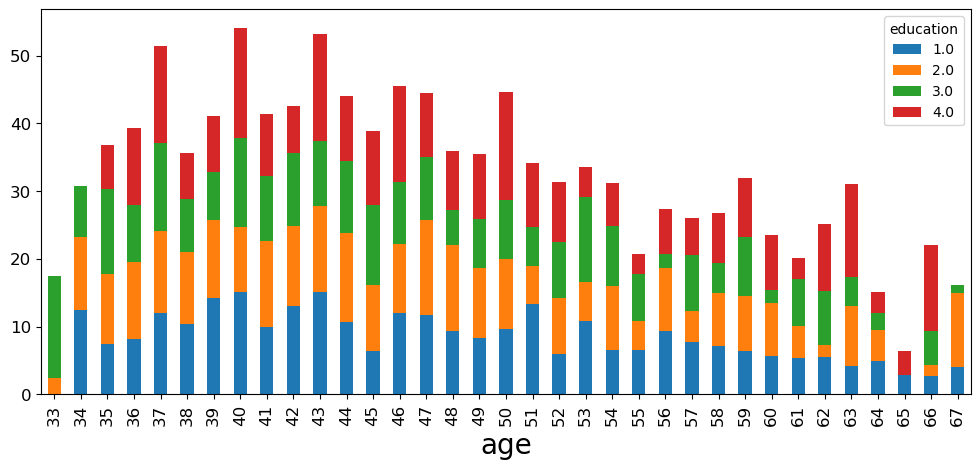

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xlabel('age', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
df_compare.plot.bar(stacked = True, ax = ax);

**We can use function `groupby` to compare the data with two different genders**

In [28]:
df.groupby('gender').agg({'education': np.mean, 'currentSmoker': np.mean, 'cigsPerDay': np.mean,
                       'BPMeds': np.mean,'prevalentStroke': np.mean, 'prevalentHyp': np.mean,
                       'diabetes': np.mean, 'totChol': np.mean, 'sysBP': np.mean,
                       'diaBP': np.mean,'BMI': np.mean, 'heartRate': np.mean, 'glucose': np.mean,
                       'TenYearCHD': np.mean})

education  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  \
gender                                                                    
0        1.963618       0.396755    5.497050  0.038348         0.005900   
1        2.000000       0.604809   13.442663  0.020345         0.005549   

        prevalentHyp  diabetes     totChol       sysBP      diaBP        BMI  \
gender                                                                         
0           0.311209  0.025074  239.638151  133.265241  82.360619  25.519651   
1           0.311961  0.029593  233.405672  131.242910  83.603576  26.115912   

        heartRate    glucose  TenYearCHD  
gender                                    
0       76.960177  81.791052    0.122911  
1       74.188656  81.937731    0.189273

**Get the basic Description Statistic information**

In [29]:
df.describe()

gender          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.250000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean    132.368025    82.912062    25.784185    75.730580    81.856127   
std      22.092444    11.974825     4.065913    11.982952    23.910128   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3656.000000  
mean      0.152352  
std       0.359411  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

**We can use `list` to obtain the specific information we want**

In [30]:
perc = [0.2, 0.4, 0.6, 0.8] # percentile list 
include = ['object', 'float', 'int'] # list of dtypes to include 

df.describe(percentiles = perc, include = include) 

gender          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
20%       0.000000    41.000000     1.000000       0.000000     0.000000   
40%       0.000000    46.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
60%       1.000000    52.000000     2.000000       1.000000     9.000000   
80%       1.000000    58.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
20%       0.000000         0.000000      0.000000     0.000000   200.000000   
40%       0.000000         0.000000      0.000000     0.000000   223.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
60%       0.000000         0.000000      0.000000     0.000000   245.000000   
80%       0.000000         0.000000      1.000000     0.000000   271.000000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean    132.368025    82.912062    25.784185    75.730580    81.856127   
std      22.092444    11.974825     4.065913    11.982952    23.910128   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
20%     114.000000    73.000000    22.530000    65.000000    70.000000   
40%     124.000000    80.000000    24.460000    72.000000    75.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
60%     133.000000    85.000000    26.330000    77.000000    81.000000   
80%     148.000000    92.000000    28.680000    85.000000    89.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3656.000000  
mean      0.152352  
std       0.359411  
min       0.000000  
20%       0.000000  
40%       0.000000  
50%       0.000000  
60%       0.000000  
80%       0.000000  
max       1.000000

**We can use `seaborn` to show the relationship between two different features**

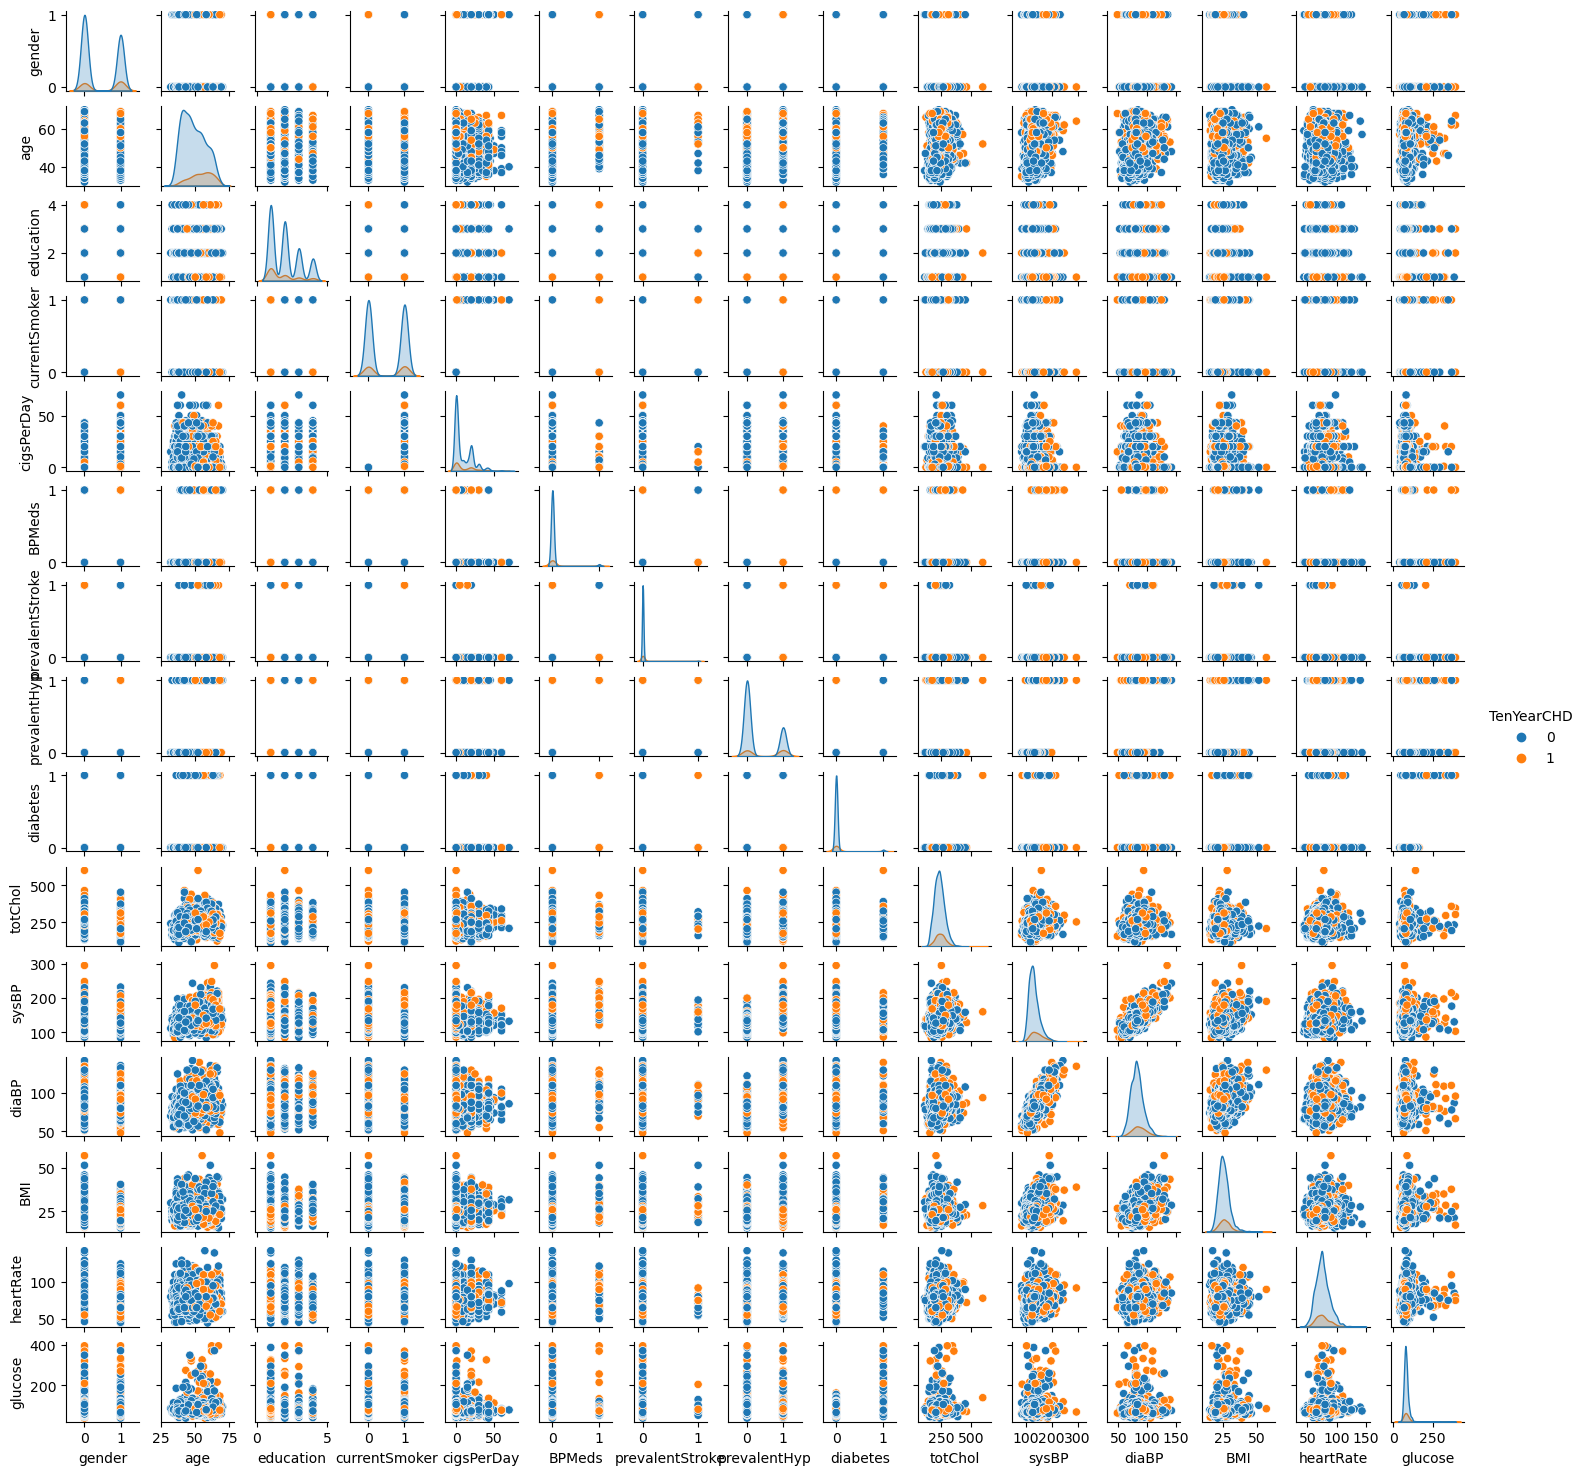

In [31]:
sns.pairplot(df, hue = 'TenYearCHD', height = 1)

**Because the graphics are too small to observe, so we apply another way to show the correlation**

# EDA (Exploratory Data Analysis)

- When we have a piece of data to analyze, if we use the `describe()`, we can get some main informations from the dataset. But for more in-depth analysis of the dataset, the informations are apparently not enough. 

- So we use ProfileReport from pandas_profiling to show the details.

In [32]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Preparation

In [33]:
X = df.drop(['TenYearCHD'], axis = 1, inplace = False)
display(X)

gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
0          1   39        4.0              0         0.0     0.0   
1          0   46        2.0              0         0.0     0.0   
2          1   48        1.0              1        20.0     0.0   
3          0   61        3.0              1        30.0     0.0   
4          0   46        3.0              1        23.0     0.0   
...      ...  ...        ...            ...         ...     ...   
4231       1   58        3.0              0         0.0     0.0   
4232       1   68        1.0              0         0.0     0.0   
4233       1   50        1.0              1         1.0     0.0   
4234       1   51        3.0              1        43.0     0.0   
4237       0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4231                0             1         0    187.0  141.0   81.0  24.96   
4232                0             1         0    176.0  168.0   97.0  23.14   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  
0          80.0     77.0  
1          95.0     76.0  
2          75.0     70.0  
3          65.0    103.0  
4          85.0     85.0  
...         ...      ...  
4231       80.0     81.0  
4232       60.0     79.0  
4233       66.0     86.0  
4234       65.0     68.0  
4237       80.0    107.0  

[3656 rows x 15 columns]

In [34]:
y = df['TenYearCHD']
display(y)

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)
print('X_train shape is ' , X_train.shape)
print('=' * 20)
print('X_test shape is ' , X_test.shape)
print('=' * 20)
print('y_train shape is ' , y_train.shape)
print('=' * 20)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1828, 15)
X_test shape is  (1828, 15)
y_train shape is  (1828,)
y_test shape is  (1828,)


**Before applying the ML models, we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [36]:
print(y_test.unique())
print(y_train.value_counts())

[0 1]
0    1535
1     293
Name: TenYearCHD, dtype: int64


**There are too many data in the X_train and X_test, so we should do some adjustments**

In [37]:
scaler = StandardScaler() # make the data standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying to the ML model

## Logistic Regression

In [38]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_predict = LR_model.predict(X_test)

In [39]:
LR_conf_matrix = confusion_matrix(y_test, LR_predict)
LR_acc_score = accuracy_score(y_test, LR_predict)

In [40]:
print("confusion matrix")
print(LR_conf_matrix)

confusion matrix
[[1533   31]
 [ 236   28]]


In [41]:
print("Accuracy of Logistic Regression:", LR_acc_score * 100, '%', '\n')
print(classification_report(y_test, LR_predict))

Accuracy of Logistic Regression: 85.39387308533917 % 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1564
           1       0.47      0.11      0.17       264

    accuracy                           0.85      1828
   macro avg       0.67      0.54      0.55      1828
weighted avg       0.81      0.85      0.81      1828



## Gaussian Naive Bayes

In [42]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_predict = NB_model.predict(X_test)

In [43]:
NB_conf_matrix = confusion_matrix(y_test, NB_predict)
NB_acc_score = accuracy_score(y_test, NB_predict)

In [44]:
print("confussion matrix")
print(NB_conf_matrix)

confussion matrix
[[1453  111]
 [ 213   51]]


In [45]:
print("Accuracy of Naive Bayes model:", NB_acc_score * 100, '%', '\n')
print(classification_report(y_test,NB_predict))

Accuracy of Naive Bayes model: 82.27571115973743 % 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1564
           1       0.31      0.19      0.24       264

    accuracy                           0.82      1828
   macro avg       0.59      0.56      0.57      1828
weighted avg       0.79      0.82      0.80      1828



## Random Forest Classifier

In [46]:
RF_model = RandomForestClassifier(n_estimators = 30, random_state = None, max_depth = None)
RF_model.fit(X_train, y_train)
RF_predict = RF_model.predict(X_test)
RF_conf_matrix = confusion_matrix(y_test, RF_predict)
RF_acc_score = accuracy_score(y_test, RF_predict)

In [47]:
print("confusion matrix")
print(RF_conf_matrix)

confusion matrix
[[1536   28]
 [ 243   21]]


In [48]:
print("Accuracy of Random Forest:", RF_acc_score * 100, '%', '\n')
print(classification_report(y_test, RF_predict))

Accuracy of Random Forest: 85.17505470459518 % 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1564
           1       0.43      0.08      0.13       264

    accuracy                           0.85      1828
   macro avg       0.65      0.53      0.53      1828
weighted avg       0.80      0.85      0.81      1828



## K-Neighbors Classifier

In [49]:
KNN_model = KNeighborsClassifier(n_neighbors = 30)
KNN_model.fit(X_train, y_train)
KNN_predict = KNN_model.predict(X_test)
KNN_conf_matrix = confusion_matrix(y_test, KNN_predict)
KNN_acc_score = accuracy_score(y_test, KNN_predict)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
print("confusion matrix")
print(KNN_conf_matrix)

confusion matrix
[[1563    1]
 [ 259    5]]


In [51]:
print("Accuracy of K-NeighborsClassifier:", KNN_acc_score * 100, '%', '\n')
print(classification_report(y_test, KNN_predict))

Accuracy of K-NeighborsClassifier: 85.77680525164114 % 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1564
           1       0.83      0.02      0.04       264

    accuracy                           0.86      1828
   macro avg       0.85      0.51      0.48      1828
weighted avg       0.85      0.86      0.80      1828



# Summary

In [52]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression', 'Gaussian Naive Bayes',
                                           'Random Forest', 'K-Nearest Neighbour'], 
                                 'Accuracy': [LR_acc_score * 100, NB_acc_score * 100,
                                              RF_acc_score * 100, KNN_acc_score * 100]})
model_evaluation.to_csv('eva.csv')

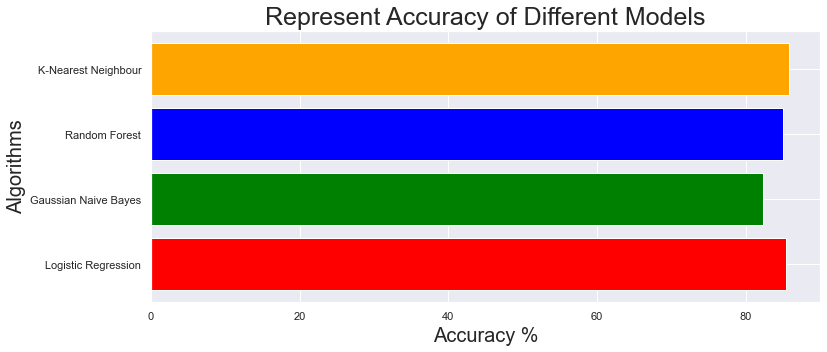

In [229]:
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize = (12, 5))
plt.title('Represent Accuracy of Different Models', fontsize = 25)
plt.xlabel('Accuracy %', fontsize = 20)
plt.ylabel('Algorithms', fontsize = 20)
plt.barh(model_evaluation['Model'], model_evaluation['Accuracy'], color = colors)
plt.show()

**Because the Accuracy of these four Algorithms are almost the same, so we are now choosing the Random Forest Model to show the important factors which will highly cause the heart problem.**

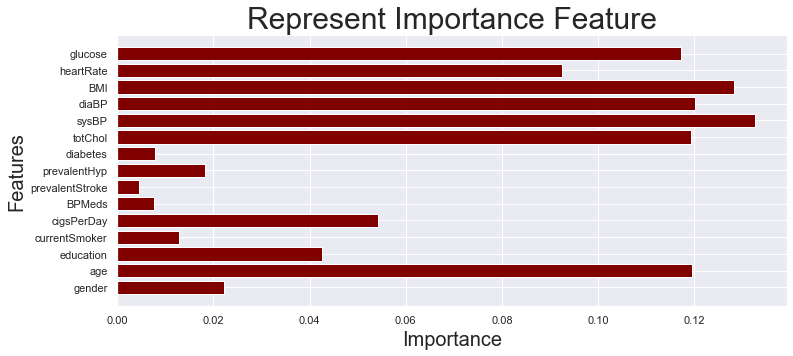

In [231]:
important_feature = pd.DataFrame({'Feature': ['gender', 'age', 'education', 'currentSmoker',
                                        'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
                                        'diabetes', 'totChol', 'sysBP', 'diaBP',
                                        'BMI', 'heartRate', 'glucose'], 
                            'Importance': RF_model.feature_importances_})

plt.figure(figsize=(12, 5))
plt.title('Represent Importance Feature', fontsize = 30)
plt.xlabel('Importance', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.barh(important_feature['Feature'], important_feature['Importance'], color = 'maroon')
plt.show()

**We notice that `sysBP`, `diaBP`, `BMI`, `age` are the main factors which cause the heart problem, so we are going to compare these data**

In [24]:
df.groupby('TenYearCHD').agg({'sysBP': np.mean, 'diaBP': np.mean, 'BMI': np.mean, 'age': np.mean})

sysBP      diaBP        BMI        age
TenYearCHD                                             
0           130.280736  82.148919  25.642975  48.708938
1           143.981149  87.157989  26.569838  54.278276